## Data Understanding
### Loading necessary packages

In [17]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import STOPWORDS,WordCloud
from gensim import corpora
import pandas as pd
import statistics
import string
import os
import re
import sys
import inspect
import numpy as np

Data acquisition

For this example we have two option for data acquisition:

*   You can download Twitter dataset directly from Twitter
*   By registering as a developer using this link [Here](https://developer.twitter.com/en) 

*   Or you can use downloaded data found at Week0/data/cleaned_fintech_data.csv 



In [18]:
tweets = pd.read_csv('/home/abel-ubuntu/workspace/Twitter-Data-Analysis/data/economic_clean.csv')
tweets.head()

,created_at,source,original_text,clean_text,sentiment,polarity,subjectivity,lang,statuses_count,favorite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place
0,Fri Apr 22 22:17:05 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @NorthstarCharts: The 10-year yield is tell...,The 10-year yield is telling us that there's a...,1,0.16,0.540000,en,281,188.0,43.0,davideiacovozzi,58634,55,NaN,gold,NorthstarCharts,NaN
1,Fri Apr 22 13:44:53 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @MichaelAArouet: German 10y mortgage rate w...,"German 10y mortgage rate went from 0,8% to 2,5...",1,0.15,0.175000,en,281,179.0,32.0,davideiacovozzi,40980,55,NaN,NaN,MichaelAArouet,NaN
2,Fri Apr 22 06:10:34 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @goldseek: When? https://t.co/kO2FfHKaZg,When? https://t.co/kO2FfHKaZg,-1,0.00,0.000000,en,281,193.0,26.0,davideiacovozzi,37461,55,False,NaN,goldseek,NaN
3,Thu Apr 21 17:22:09 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @charliebilello: The 30-year mortgage rate ...,The 30-year mortgage rate in the US rises to 5...,-1,0.00,0.066667,en,281,620.0,213.0,davideiacovozzi,383561,55,NaN,NaN,charliebilello,NaN
4,Thu Apr 21 10:32:26 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @biancoresearch: Rates rise until something...,Rates rise until something breaks … is anythin...,0,-0.40,0.400000,en,281,1787.0,417.0,davideiacovozzi,182570,55,False,NaN,biancoresearch,NaN


# Exploring the Data

In [19]:
#To get information about the data
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16465 entries, 0 to 16464
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   created_at          16465 non-null  object 
 1   source              16465 non-null  object 
 2   original_text       16465 non-null  object 
 3   clean_text          8220 non-null   object 
 4   sentiment           16465 non-null  int64  
 5   polarity            16465 non-null  float64
 6   subjectivity        16465 non-null  float64
 7   lang                16465 non-null  object 
 8   statuses_count      16465 non-null  int64  
 9   favorite_count      16465 non-null  float64
 10  retweet_count       16465 non-null  float64
 11  original_author     16465 non-null  object 
 12  followers_count     16465 non-null  int64  
 13  friends_count       16465 non-null  int64  
 14  possibly_sensitive  6206 non-null   object 
 15  hashtags            5278 non-null   object 
 16  user

In [20]:
tweets.shape

(16465, 18)

In [21]:
print("The number of missing value(s) based on columns:\n{}".format(tweets.isnull().sum()))
print("The number of missing value(s): {}".format(tweets.isnull().sum().sum()))
print("Columns having missing value(s):{}".format(tweets.columns[tweets.isnull().any()]))

The number of missing value(s) based on columns:
created_at                0
source                    0
original_text             0
clean_text             8245
sentiment                 0
polarity                  0
subjectivity              0
lang                      0
statuses_count            0
favorite_count            0
retweet_count             0
original_author           0
followers_count           0
friends_count             0
possibly_sensitive    10259
hashtags              11187
user_mentions          4307
place                  5707
dtype: int64
The number of missing value(s): 39705
Columns having missing value(s):Index(['clean_text', 'possibly_sensitive', 'hashtags', 'user_mentions',
       'place'],
      dtype='object')


# Data Preparation

In [22]:
import sys
import os

In [27]:
sys.path.append(os.path.abspath(os.path.join('../fix_bug')))

In [28]:
from clean_tweets_dataframe import CleanTweets

In [36]:
tweets_df = pd.DataFrame(columns=['original_text','sentiment','lang','hashtags', 'clean_text'])

tweets_df['original_text'] =  tweets['original_text'].to_list()
tweets_df['sentiment'] =  tweets['sentiment'].to_list()
tweets_df['lang'] = tweets['lang'].to_list()
tweets_df['hashtags'] = tweets['hashtags'].to_list()
tweets_df['clean_text'] = tweets['clean_text'].to_list()


tweets_df.head()

,original_text,sentiment,lang,hashtags,clean_text
0,RT @NorthstarCharts: The 10-year yield is tell...,1,en,gold,The 10-year yield is telling us that there's a...
1,RT @MichaelAArouet: German 10y mortgage rate w...,1,en,NaN,"German 10y mortgage rate went from 0,8% to 2,5..."
2,RT @goldseek: When? https://t.co/kO2FfHKaZg,-1,en,NaN,When? https://t.co/kO2FfHKaZg
3,RT @charliebilello: The 30-year mortgage rate ...,-1,en,NaN,The 30-year mortgage rate in the US rises to 5...
4,RT @biancoresearch: Rates rise until something...,0,en,NaN,Rates rise until something breaks … is anythin...


In [37]:
tweets_df

,original_text,sentiment,lang,hashtags,clean_text
0,RT @NorthstarCharts: The 10-year yield is tell...,1,en,gold,The 10-year yield is telling us that there's a...
1,RT @MichaelAArouet: German 10y mortgage rate w...,1,en,NaN,"German 10y mortgage rate went from 0,8% to 2,5..."
2,RT @goldseek: When? https://t.co/kO2FfHKaZg,-1,en,NaN,When? https://t.co/kO2FfHKaZg
3,RT @charliebilello: The 30-year mortgage rate ...,-1,en,NaN,The 30-year mortgage rate in the US rises to 5...
4,RT @biancoresearch: Rates rise until something...,0,en,NaN,Rates rise until something breaks … is anythin...
...,...,...,...,...,...
16460,RT @CHARANJITCHANNI: Best wishes &amp; heartfe...,1,en,NaN,Best wishes &amp; heartfelt congratulations to...
16461,RT @pbhushan1: Thank you @BajpayeeManoj for th...,1,en,NaN,Thank you @BajpayeeManoj for this beautiful me...
16462,RT @s_shreyatweets: Agree ?👇 https://t.co/R54Z...,-1,en,NaN,Agree ?👇 https://t.co/R54Zjw3kGB
16463,RT @tejjINC: 1. Peace Yatra by Late Sunil Dutt...,0,en,NaN,1. Peace Yatra by Late Sunil Dutt from Mumbai ...


In [38]:
tweets_df = tweets_df.fillna("")
tweets_df

,original_text,sentiment,lang,hashtags,clean_text
0,RT @NorthstarCharts: The 10-year yield is tell...,1,en,gold,The 10-year yield is telling us that there's a...
1,RT @MichaelAArouet: German 10y mortgage rate w...,1,en,,"German 10y mortgage rate went from 0,8% to 2,5..."
2,RT @goldseek: When? https://t.co/kO2FfHKaZg,-1,en,,When? https://t.co/kO2FfHKaZg
3,RT @charliebilello: The 30-year mortgage rate ...,-1,en,,The 30-year mortgage rate in the US rises to 5...
4,RT @biancoresearch: Rates rise until something...,0,en,,Rates rise until something breaks … is anythin...
...,...,...,...,...,...
16460,RT @CHARANJITCHANNI: Best wishes &amp; heartfe...,1,en,,Best wishes &amp; heartfelt congratulations to...
16461,RT @pbhushan1: Thank you @BajpayeeManoj for th...,1,en,,Thank you @BajpayeeManoj for this beautiful me...
16462,RT @s_shreyatweets: Agree ?👇 https://t.co/R54Z...,-1,en,,Agree ?👇 https://t.co/R54Zjw3kGB
16463,RT @tejjINC: 1. Peace Yatra by Late Sunil Dutt...,0,en,,1. Peace Yatra by Late Sunil Dutt from Mumbai ...


<AxesSubplot:ylabel='sentiment'>

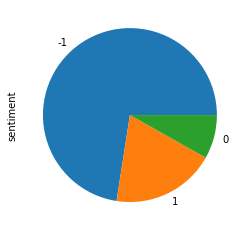

In [39]:
tweets_df.sentiment.value_counts().plot(kind='pie')

In [40]:
tweets_df['clean_text'] =  tweets_df['clean_text'].astype(str)
tweets_df['clean_text'] =  tweets_df['clean_text'].apply(lambda x: x.lower())
tweets_df['clean_text']= tweets_df['clean_text'].apply(lambda x: x.translate(str.maketrans(' ', ' ', string.punctuation)))
tweets_df['sentiment'] =  tweets_df['sentiment'].astype(int)
tweets_df['hashtags'] = tweets_df['hashtags'].astype(str)
tweets_df['hashtags'] = tweets_df['hashtags'].apply(lambda x: x.lower())
tweets_df['hashtags']= tweets_df['hashtags'].apply(lambda x: x.translate(str.maketrans(' ', ' ', string.punctuation)))

In [41]:
flattened_words_df = pd.DataFrame(
    [word for words_list in tweets_df.clean_text
    for word in words_list.split(' ')],
    columns=['word'])

flattened_words_df

,word
0,the
1,10year
2,yield
3,is
4,telling
...,...
146223,an
146224,mla
146225,talks
146226,b…


<AxesSubplot:>

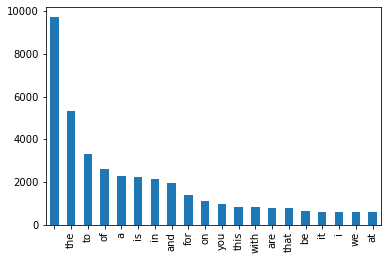

In [42]:
flattened_words_df.word.value_counts()[:20].plot(kind='bar')

In [43]:
flattened_hashtags_df = pd.DataFrame(
    [hashtag for hashtags_list in tweets_df.hashtags
    for hashtag in hashtags_list.split(',')],
    columns=['hashtag'])

flattened_hashtags_df.drop(flattened_hashtags_df[flattened_hashtags_df['hashtag'] == ""].index, inplace=True)
flattened_hashtags_df.reset_index(drop=True, inplace=True)
flattened_hashtags_df

,hashtag
0,gold
1,bonds
2,ecb
3,deflation
4,deflation
...,...
5273,telangana
5274,pnpkakampimo
5275,pnpkakampimo
5276,pnpkakampimo


<AxesSubplot:>

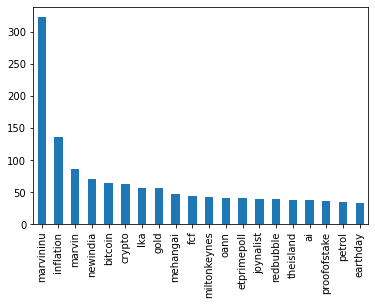

In [44]:
flattened_hashtags_df.hashtag.value_counts()[:20].plot(kind='bar')

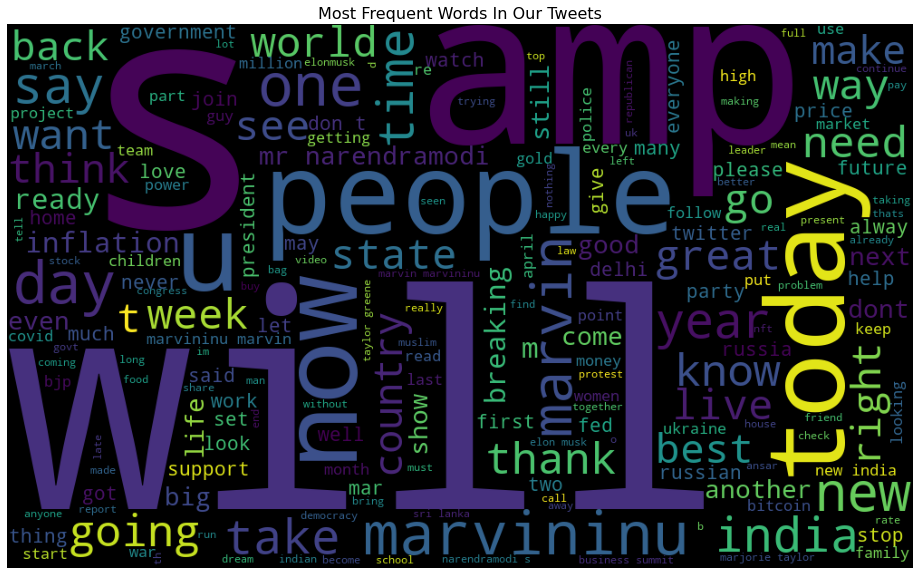

In [46]:
plt.figure(figsize=(20, 10))
plt.imshow(WordCloud(width=1000,height=600,stopwords=STOPWORDS).generate(' '.join(tweets_df.clean_text.values)))
plt.axis('off')
plt.title('Most Frequent Words In Our Tweets',fontsize=16)
plt.show()

In [47]:
tweets_df = tweets_df.drop(['original_text'],axis=1)
tweets_df

,sentiment,lang,hashtags,clean_text
0,1,en,gold,the 10year yield is telling us that theres a h...
1,1,en,,german 10y mortgage rate went from 08 to 250 👇...
2,-1,en,,when httpstcoko2ffhkazg
3,-1,en,,the 30year mortgage rate in the us rises to 51...
4,0,en,,rates rise until something breaks … is anythin...
...,...,...,...,...
16460,1,en,,best wishes amp heartfelt congratulations to p...
16461,1,en,,thank you bajpayeemanoj for this beautiful mes...
16462,-1,en,,agree 👇 httpstcor54zjw3kgb
16463,0,en,,1 peace yatra by late sunil dutt from mumbai t...


In [48]:
tweets_df.to_csv('../data/model_ready_data.csv', index=False)
print('Model Ready Data Successfully Saved.!!!')

Model Ready Data Successfully Saved.!!!
